In [2]:
import pandas as pd 
import numpy as np 

from wage_functions import clean_wage, calculate_wage

In [12]:
df = pd.read_csv('hours_rate_date.csv')

In [4]:
df.head()

,Name,Month,Total Hours,Average Rate
0,Alice,2024-01-01,245,$25.00
1,Alice,2024-02-01,224,26.00 $
2,Alice,2024-03-01,250,$27.00
3,Bob,2024-01-01,240,€22.50
4,Bob,2024-02-01,230,€ 23.00


In [5]:
df.columns

Index(['Name', 'Month', 'Total Hours', 'Average Rate'], dtype='object')

In [6]:
df['Average Rate']

0       $25.00
1     26.00 $ 
2       $27.00
3       €22.50
4      € 23.00
5      24.00 €
6       $30.00
7       $31.00
8       $32.00
9       £28.50
10      £29.00
11     30.00£ 
Name: Average Rate, dtype: object

In [13]:
df['Rate']=df['Average Rate'].apply(lambda x: clean_wage(x))

In [14]:
df

,Name,Month,Total Hours,Average Rate,Rate
0,Alice,2024-01-01,245,$25.00,25.00
1,Alice,2024-02-01,224,26.00 $,26.00
2,Alice,2024-03-01,250,$27.00,27.00
3,Bob,2024-01-01,240,€22.50,22.50
4,Bob,2024-02-01,230,€ 23.00,23.00
5,Bob,2024-03-01,245,24.00 €,24.00
6,Charlie,2024-01-01,255,$30.00,30.00
7,Charlie,2024-02-01,238,$31.00,31.00
8,Charlie,2024-03-01,260,$32.00,32.00
9,Diana,2024-01-01,220,£28.50,28.50


In [23]:
# x['Total Hours'], x['Rate']
df['Wage'] = df.apply(lambda x: calculate_wage(x['Total Hours'], x['Rate']), axis=1)

In [29]:
df.to_csv('calculated_hours_rate_date.csv', index=False, float_format='%.2f',)

In [32]:
def calculate_all_wages(wage_file:str)->pd.DataFrame:
    df = pd.read_csv(wage_file)
    df['Rate']=df['Average Rate'].apply(lambda x: clean_wage(x))
    df.drop('Average Rate',inplace=True, axis=1)
    df['Wage'] = df.apply(lambda x: calculate_wage(x['Total Hours'], x['Rate']), axis=1)
    return df

In [71]:
df_calculated = calculate_all_wages('hours_rate_date.csv')

In [61]:
df_calculated

,Name,Month,Total Hours,Rate,Wage
0,Alice,2024-01-01,245,25.00,7021.250
1,Alice,2024-02-01,224,26.00,6483.100
2,Alice,2024-03-01,250,27.00,7785.450
3,Bob,2024-01-01,240,22.50,6150.375
4,Bob,2024-02-01,230,23.00,5942.050
5,Bob,2024-03-01,245,24.00,6740.400
6,Charlie,2024-01-01,255,30.00,8875.500
7,Charlie,2024-02-01,238,31.00,8380.850
8,Charlie,2024-03-01,260,32.00,9707.200
9,Diana,2024-01-01,220,28.50,6935.475


In [88]:
monthly_wages = df.groupby('Month')['Wage'].sum().reset_index()

In [89]:
monthly_wages

,Month,Wage
0,2024-01-01,28982.60
1,2024-02-01,28515.65
2,2024-03-01,31083.55


In [44]:
monthly_wages.dtypes

Month     object
Wage     float64
dtype: object

In [92]:
monthly_wages['Month'] = pd.to_datetime(monthly_wages['Month'])

In [93]:
monthly_wages.dtypes

Month    datetime64[ns]
Wage            float64
dtype: object

In [94]:
monthly_wages['Month'].dt.month

0    1
1    2
2    3
Name: Month, dtype: int32

In [95]:
monthly_wages.sort_values('Month',ascending=False,inplace=True)

In [96]:
monthly_wages

,Month,Wage
2,2024-03-01,31083.55
1,2024-02-01,28515.65
0,2024-01-01,28982.60


In [98]:
monthly_wages['Month-Year']=monthly_wages['Month'].dt.month.astype('str')+'-'+monthly_wages['Month'].dt.year.astype('str')

In [99]:
monthly_wages

,Month,Wage,Month-Year
2,2024-03-01,31083.55,3-2024
1,2024-02-01,28515.65,2-2024
0,2024-01-01,28982.60,1-2024


In [100]:
monthly_wages.set_index('Month-Year',inplace=True)

In [101]:
monthly_wages

,Month,Wage
Month-Year,,
3-2024,2024-03-01,31083.55
2-2024,2024-02-01,28515.65
1-2024,2024-01-01,28982.60


In [104]:
monthly_wages.reset_index(inplace=True)

<Axes: title={'center': 'Wages per month'}>

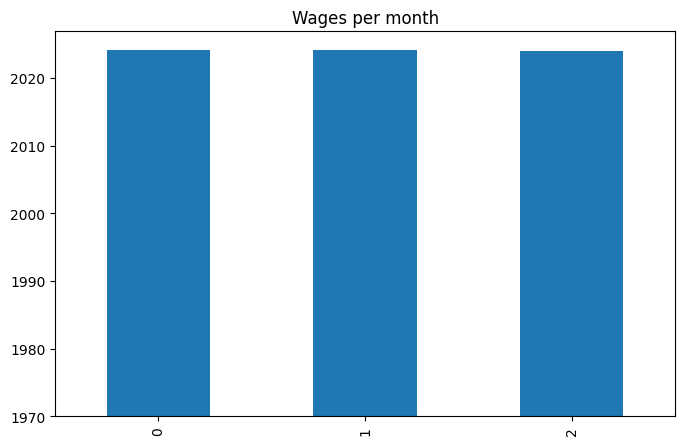

In [106]:
monthly_wages['Month'].plot(kind='bar',figsize=(8,5), title='Wages per month')